In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function that takes the arrays as input and create plots:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,3))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

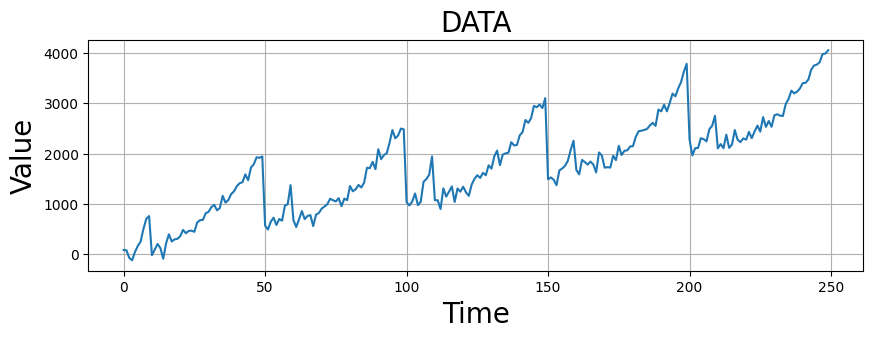

In [3]:
df = pd.read_csv("Seasonality_upward_noise.csv")
time = df["time"].copy()
values = df["values"].copy()
plot_time_series(time=time, values=values, label="DATA")


In [4]:
#checks for zeroes in values 
for i in values:
    if i == 0:
        print("zerro")
        break
else: print("NO zeroes")

NO zeroes


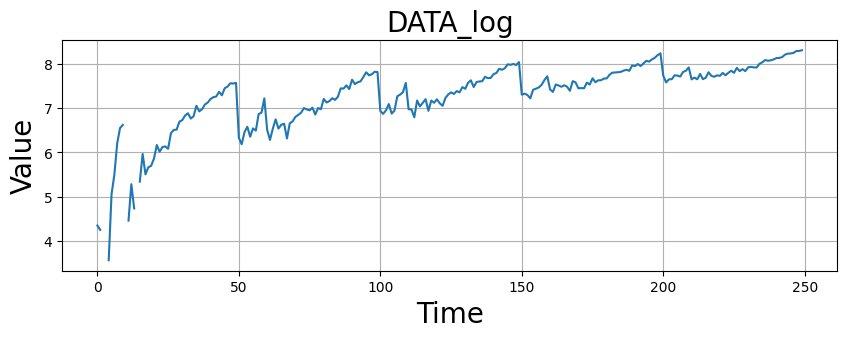

In [7]:
valueslog = np.log(values)
plot_time_series(time=time, values=valueslog, label="DATA_log")


In [6]:
valueslog

0      4.350827
1      4.252032
2           NaN
3           NaN
4      3.567384
         ...   
245    8.235352
246    8.247726
247    8.289245
248    8.291967
249    8.308565
Name: values, Length: 250, dtype: float64

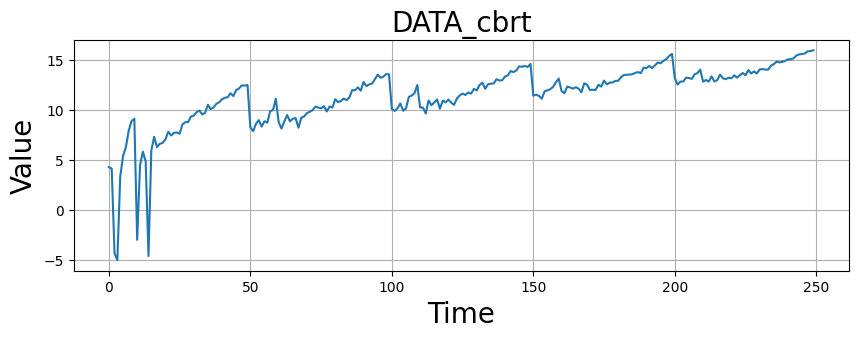

In [9]:
# Looks like best fit 
values_cbrt = np.cbrt(values)
plot_time_series(time=time, values=values_cbrt, label="DATA_cbrt")

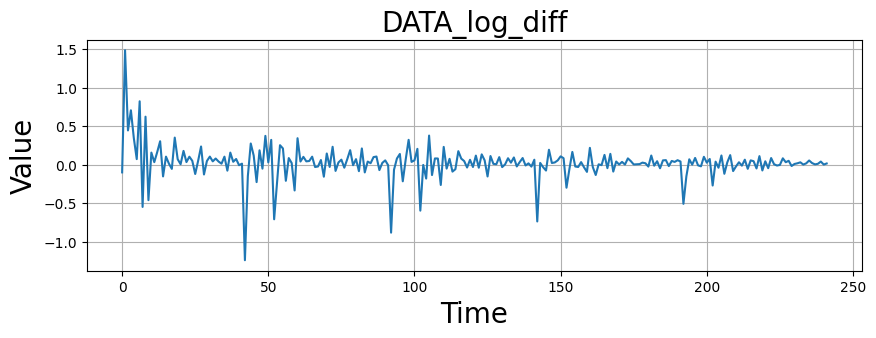

In [11]:
# this is diferencing applied after log 
time = np.arange(242)  
values_diff = valueslog.diff().dropna()
plot_time_series(time=time, values=values_diff, label="DATA_log_diff")


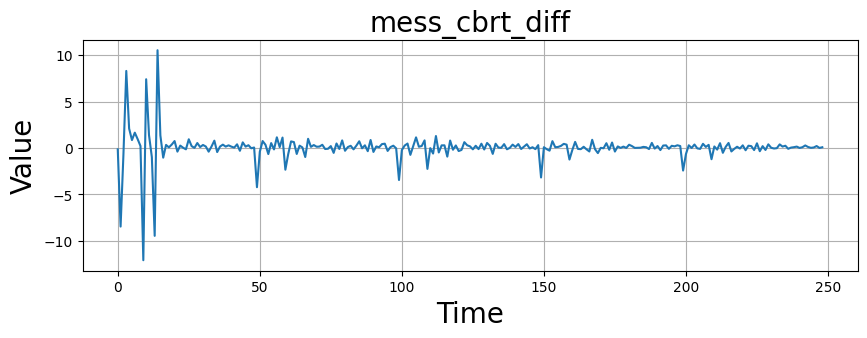

In [12]:
#this is diff after cbrt
time = np.arange(249) 
values_diff = values_cbrt.diff().dropna()
plot_time_series(time=time, values=values_diff, label="mess_cbrt_diff")

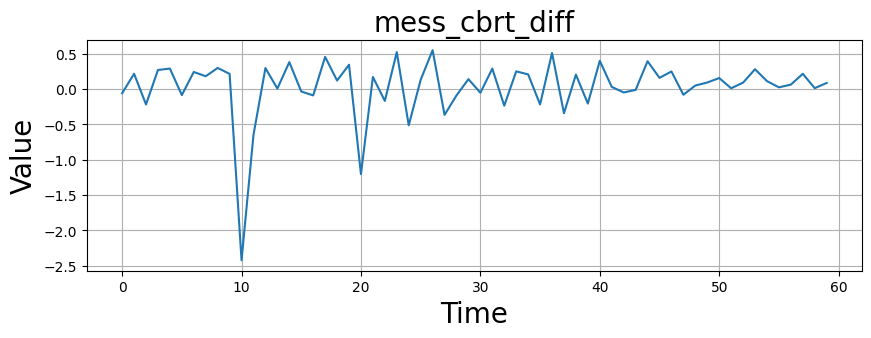

In [13]:
#Look only at last 60 months ( e.g. 5 years of data)
# There is probably bether way of doing this with pandas
values_list = values_diff.to_list() # extract to python list
values_list = values_list[-60:] # take last 60 values
values_list = np.array(values_list)# make np.array of it
time= np.arange(60)# generate 60 int as time representation
plot_time_series(time=time, values=values_list, label="Data_cbrt_diff") # this is last leg of graf above 

In [32]:
#df1 = pd.read_csv("ice.csv")
#date = df1["DATE"].copy()
#date_list = date.to_list()
#date_list = date_list[-60:]

In [17]:
#df = pd.DataFrame(list(zip(date_list, values_list)), columns=["time", "values"])
#df.head()
#df.to_csv('final.csv', index=False)